In [37]:
import torch
import matplotlib.pyplot as plt
import hydra
from hydra.core.global_hydra import GlobalHydra
from omegaconf import DictConfig, OmegaConf
!cd /home/tmarwah/projects/3DMamba/
!pwd
import os
os.chdir('/home/tmarwah/projects/3DMamba/')
import numpy as np

/home/tmarwah/projects/3DMamba


In [38]:
# This is a workaround for reinitializing Hydra in a Jupyter notebook.
GlobalHydra.instance().clear()

def get_dataset(config_path="../configs/dataset", dataset_name="nuscenes_lidar_v1.0", **kwargs):
    # Initialize Hydra once per notebook session.
    if not GlobalHydra.instance().is_initialized():
        hydra.initialize(config_path=config_path, version_base=None)
    
    cfg = hydra.compose(config_name=dataset_name)
    # print(OmegaConf.to_yaml(cfg))
    # instantiate the dataset
    dataset = hydra.utils.instantiate(cfg.params, **kwargs)
    return dataset

In [39]:
dataset = get_dataset(if_test=False)

Loading NuScenes tables for version v1.0-trainval...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
34149 lidarseg,
Done loading in 40.372 seconds.
Reverse indexing ...
Done reverse indexing in 6.5 seconds.


In [8]:
len(dataset)

1800

In [9]:
from collections import Counter
c = Counter()
for x,y in dataset:
    c.update(y.flatten().tolist())

In [45]:
len(class_names)

32

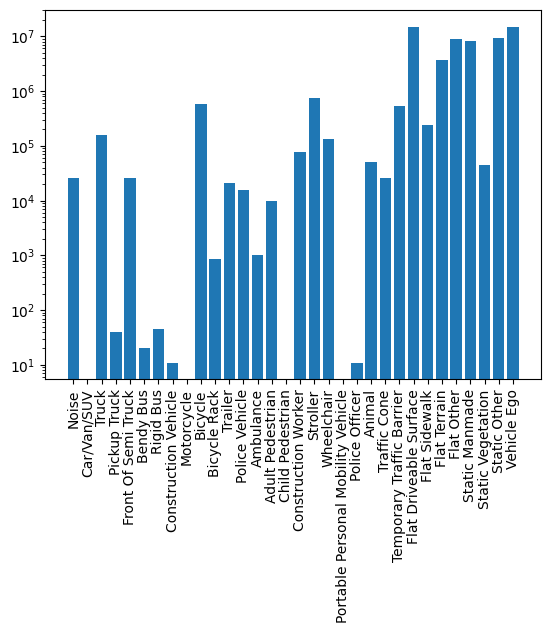

In [51]:
# plot histogram
plt.bar(list(range(32)), [c.get(i,0) for i in range(32)])
class_names = [
    "Noise",
    "Car/Van/SUV",
    "Truck",
    "Pickup Truck",
    "Front Of Semi Truck",
    "Bendy Bus",
    "Rigid Bus",
    "Construction Vehicle",
    "Motorcycle",
    "Bicycle",
    "Bicycle Rack",
    "Trailer",
    "Police Vehicle",
    "Ambulance",
    "Adult Pedestrian",
    "Child Pedestrian",
    "Construction Worker",
    "Stroller",
    "Wheelchair",
    "Portable Personal Mobility Vehicle",
    "Police Officer",
    "Animal",
    "Traffic Cone",
    "Temporary Traffic Barrier",
    "Flat Driveable Surface",
    "Flat Sidewalk",
    "Flat Terrain",
    "Flat Other",
    "Static Manmade",
    "Static Vegetation",
    "Static Other",
    "Vehicle Ego"
]
#insert class names in x
plt.xticks(list(range(32)), class_names, rotation=90)
#log scale
plt.yscale("log")
plt.show()

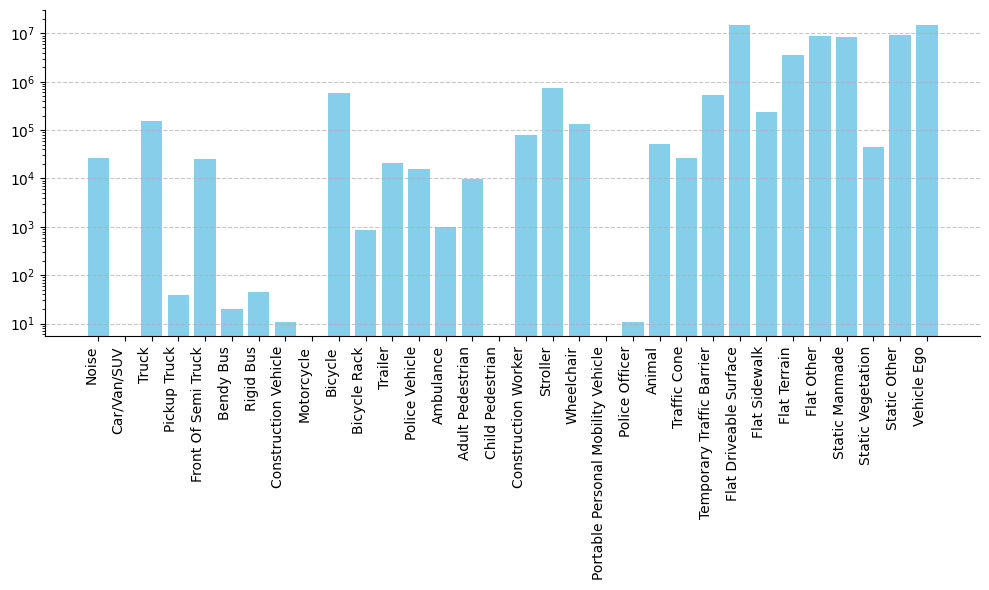

In [56]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram
bars = ax.bar(range(32), [c.get(i, 0) for i in range(32)], color='skyblue')

# Set x-axis labels
ax.set_xticks(range(32))
ax.set_xticklabels(class_names, rotation=90, fontsize=10, ha='right')

# Set y-axis scale to logarithmic
ax.set_yscale("log")

# Set y-axis label
# ax.set_ylabel("Number of Appearances", fontsize=12)

# Set plot title
# ax.set_title("Number of Appearances of Each Class in subset of NuScenes", fontsize=14)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# # Add value labels above each bar
# for bar in bars:
#     height = bar.get_height()
#     ax.annotate('{}'.format(int(height)),
#                 xy=(bar.get_x() + bar.get_width() / 2, height),
#                 xytext=(0, 3),  # 3 points vertical offset
#                 textcoords="offset points",
#                 ha='center', va='bottom')

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

In [23]:
# sort it
inv_weights = np.array([c.get(i,0) for i in range(0, 32)])
print(inv_weights)

[   26202        0   157558       39    25490       20       45       11
        0   585875      842    21101    15494     1005     9690        0
    77345   734417   133684        0       11    50390    26333   533097
 15008391   239541  3631509  8909036  8330221    44969  9336154 14600250]


In [35]:
weights = np.zeros_like(inv_weights).astype(float)
print(inv_weights[inv_weights!=0])
weights[inv_weights!=0] = 1.0/(inv_weights[inv_weights!=0].astype(float))
weights = weights/np.sum(weights)
print(weights)

[   26202   157558       39    25490       20       45       11   585875
      842    21101    15494     1005     9690    77345   734417   133684
       11    50390    26333   533097 15008391   239541  3631509  8909036
  8330221    44969  9336154 14600250]
[1.35205929e-04 0.00000000e+00 2.24848357e-05 9.08375833e-02
 1.38982572e-04 1.77133287e-01 7.87259056e-02 3.22060523e-01
 0.00000000e+00 6.04679454e-06 4.20744151e-03 1.67890894e-04
 2.28647589e-04 3.52504055e-03 3.65600181e-04 0.00000000e+00
 4.58034230e-05 4.82377961e-06 2.65002973e-05 0.00000000e+00
 3.22060523e-01 7.03049365e-05 1.34533314e-04 6.64544304e-06
 2.36045673e-07 1.47893920e-05 9.75535445e-07 3.97648606e-07
 4.25278723e-07 7.87801763e-05 3.79456653e-07 2.42644184e-07]


In [36]:
print(list(weights))

[0.00013520592892801204, 0.0, 2.248483574157943e-05, 0.09083758332748132, 0.00013898257158775096, 0.1771332874885886, 0.07872590555048382, 0.3220605227065247, 0.0, 6.0467945376945105e-06, 0.004207441508042484, 0.00016789089378568654, 0.00022864758937471094, 0.0035250405470365885, 0.0003656001805750022, 0.0, 4.580342297203144e-05, 4.82377960991068e-06, 2.650029734128072e-05, 0.0, 0.3220605227065247, 7.030493649080714e-05, 0.0001345333137041648, 6.6454430427704e-06, 2.3604567270214187e-07, 1.4789392002921302e-05, 9.75535445395226e-07, 3.9764860640048733e-07, 4.252787230701048e-07, 7.87801763386282e-05, 3.7945665311131026e-07, 2.426441841592967e-07]
